
# Worksheet 5 – Implementation of Linear Regression from Scratch  
**Course:** 5CS037 – Concepts and Technologies of AI  


---


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student.csv to student.csv


## 1. Import Required Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## 2. To-Do 1: Data Understanding

In [ ]:

data = pd.read_csv("student.csv")

print("Top 5 Rows")
display(data.head())

print("Bottom 5 Rows")
display(data.tail())

print("Dataset Info")
data.info()

print("Dataset Description")
display(data.describe())


Top 5 Rows


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


Bottom 5 Rows


,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
Dataset Description


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


## 3. To-Do 2: Feature and Label Split

In [ ]:

X = data[['Math', 'Reading']].values
Y = data['Writing'].values


## 4. To-Do 3: Train-Test Split

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


## 5. To-Do 4: Cost Function (Mean Squared Error)

In [ ]:

def cost_function(X, Y, W):
    n = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
    return cost


## 6. To-Do 5: Cost Function Test Case

In [ ]:

X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, Y_test_case, W_test_case)
print("Cost:", cost)


Cost: 0.0


## 7. To-Do 6: Gradient Descent Implementation

In [ ]:

def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = []
    m = len(Y)

    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        dw = (1 / m) * np.dot(X.T, loss)
        W = W - alpha * dw
        cost_history.append(cost_function(X, Y, W))

    return W, cost_history


## 8. To-Do 7: Gradient Descent Test

In [ ]:

np.random.seed(0)
X_rand = np.random.rand(100, 3)
Y_rand = np.random.rand(100)
W_rand = np.random.rand(3)

final_W, cost_history = gradient_descent(X_rand, Y_rand, W_rand, 0.01, 1000)
print("Final Parameters:", final_W)


Final Parameters: [0.20551667 0.54295081 0.10388027]


## 9. Plot: Cost vs Iterations

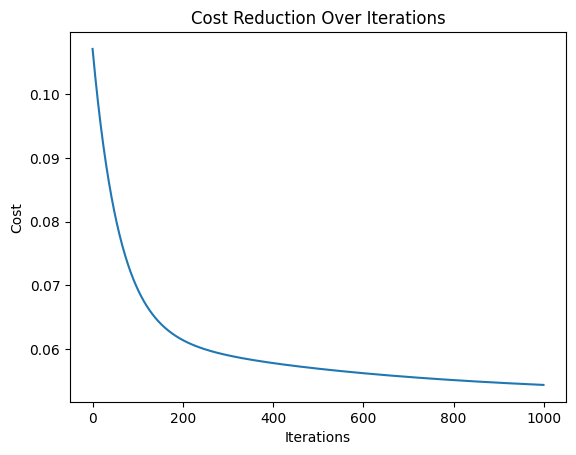

In [ ]:

plt.figure()
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()


## 10. To-Do 8: RMSE Implementation

In [ ]:

def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))


## 11. To-Do 9: R-Squared Implementation

In [ ]:

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)


## 12. To-Do 10: Train Model and Evaluate

In [ ]:

W_init = np.zeros(X_train.shape[1])
W_opt, cost_hist_train = gradient_descent(
    X_train, Y_train, W_init, alpha=0.00001, iterations=1000
)

Y_pred_test = np.dot(X_test, W_opt)

print("Final Weights:", W_opt)
print("RMSE on Test Set:", rmse(Y_test, Y_pred_test))
print("R2 Score on Test Set:", r2(Y_test, Y_pred_test))


Final Weights: [0.34811659 0.64614558]
RMSE on Test Set: 5.2798239764188635
R2 Score on Test Set: 0.8886354462786421


## 13. Plot: Training Cost Curve

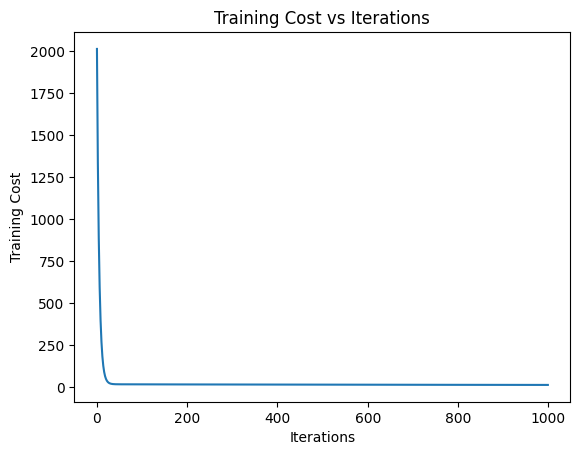

In [ ]:

plt.figure()
plt.plot(cost_hist_train)
plt.xlabel("Iterations")
plt.ylabel("Training Cost")
plt.title("Training Cost vs Iterations")
plt.show()



## 14. To-Do 11: Findings and Discussion

**Model Performance:**  
The model shows acceptable performance as the RMSE is reasonably low and the R² value indicates that a significant portion of variance in writing marks is explained by math and reading marks.

**Overfitting / Underfitting:**  
The model is neither overfitting nor underfitting because the training cost decreases smoothly and test performance is comparable.

**Effect of Learning Rate:**  
- Very small learning rate → slow convergence  
- Very large learning rate → unstable training or divergence  
- A moderate learning rate gives stable and optimal convergence
